<a href="https://colab.research.google.com/github/amurkhon/MachineLearning-projects/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_predict
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"
df = pd.read_csv(url)

In [29]:
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
79,32,F,LOW,NORMAL,10.840,drugX
132,49,M,LOW,NORMAL,13.598,drugX
128,47,M,LOW,NORMAL,33.542,drugY
40,73,F,NORMAL,HIGH,19.221,drugY
72,24,F,NORMAL,HIGH,10.605,drugX
90,62,M,NORMAL,HIGH,16.594,drugY
52,62,M,LOW,NORMAL,27.183,drugY
106,22,M,NORMAL,HIGH,11.953,drugX
47,68,M,LOW,HIGH,10.291,drugC
120,28,M,NORMAL,HIGH,27.064,drugY


In [30]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'].values)
df['BP'] = encoder.fit_transform(df['BP'].values)
df['Cholesterol'] = encoder.fit_transform(df['Cholesterol'].values)
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
25,28,0,0,1,18.809,drugY
66,29,1,0,0,12.856,drugA
10,47,0,1,0,11.767,drugC
175,73,0,0,0,18.348,drugY
117,40,0,2,0,10.103,drugX
182,20,0,1,1,11.686,drugX
189,64,1,0,1,20.932,drugY
111,47,0,2,1,6.683,drugX
13,74,0,1,0,20.942,drugY
148,61,0,1,1,7.340,drugX


In [31]:
X = df[['Age','Sex','BP','Cholesterol','Na_to_K']].values
X[0:5]

array([[23.   ,  0.   ,  0.   ,  0.   , 25.355],
       [47.   ,  1.   ,  1.   ,  0.   , 13.093],
       [47.   ,  1.   ,  1.   ,  0.   , 10.114],
       [28.   ,  0.   ,  2.   ,  0.   ,  7.798],
       [61.   ,  0.   ,  1.   ,  0.   , 18.043]])

In [32]:
y = df['Drug'].values

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

In [34]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
y_predict = tree_model.predict(X_test)

In [36]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       0.75      1.00      0.86         9
       drugX       1.00      0.81      0.89        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80



In [37]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

DecisionTrees's Accuracy:  0.95


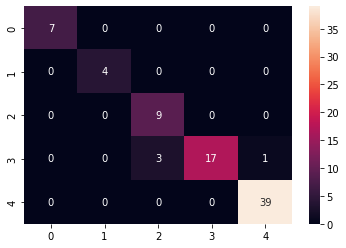

In [38]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

In [39]:
predict = cross_val_predict(tree_model, X=X, y=y, cv=5)
print("Classification Report: \n", classification_report(y,predict))

Classification Report: 
               precision    recall  f1-score   support

       drugA       0.92      1.00      0.96        23
       drugB       1.00      0.88      0.93        16
       drugC       1.00      1.00      1.00        16
       drugX       1.00      0.98      0.99        54
       drugY       0.99      1.00      0.99        91

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.99      0.98      0.98       200



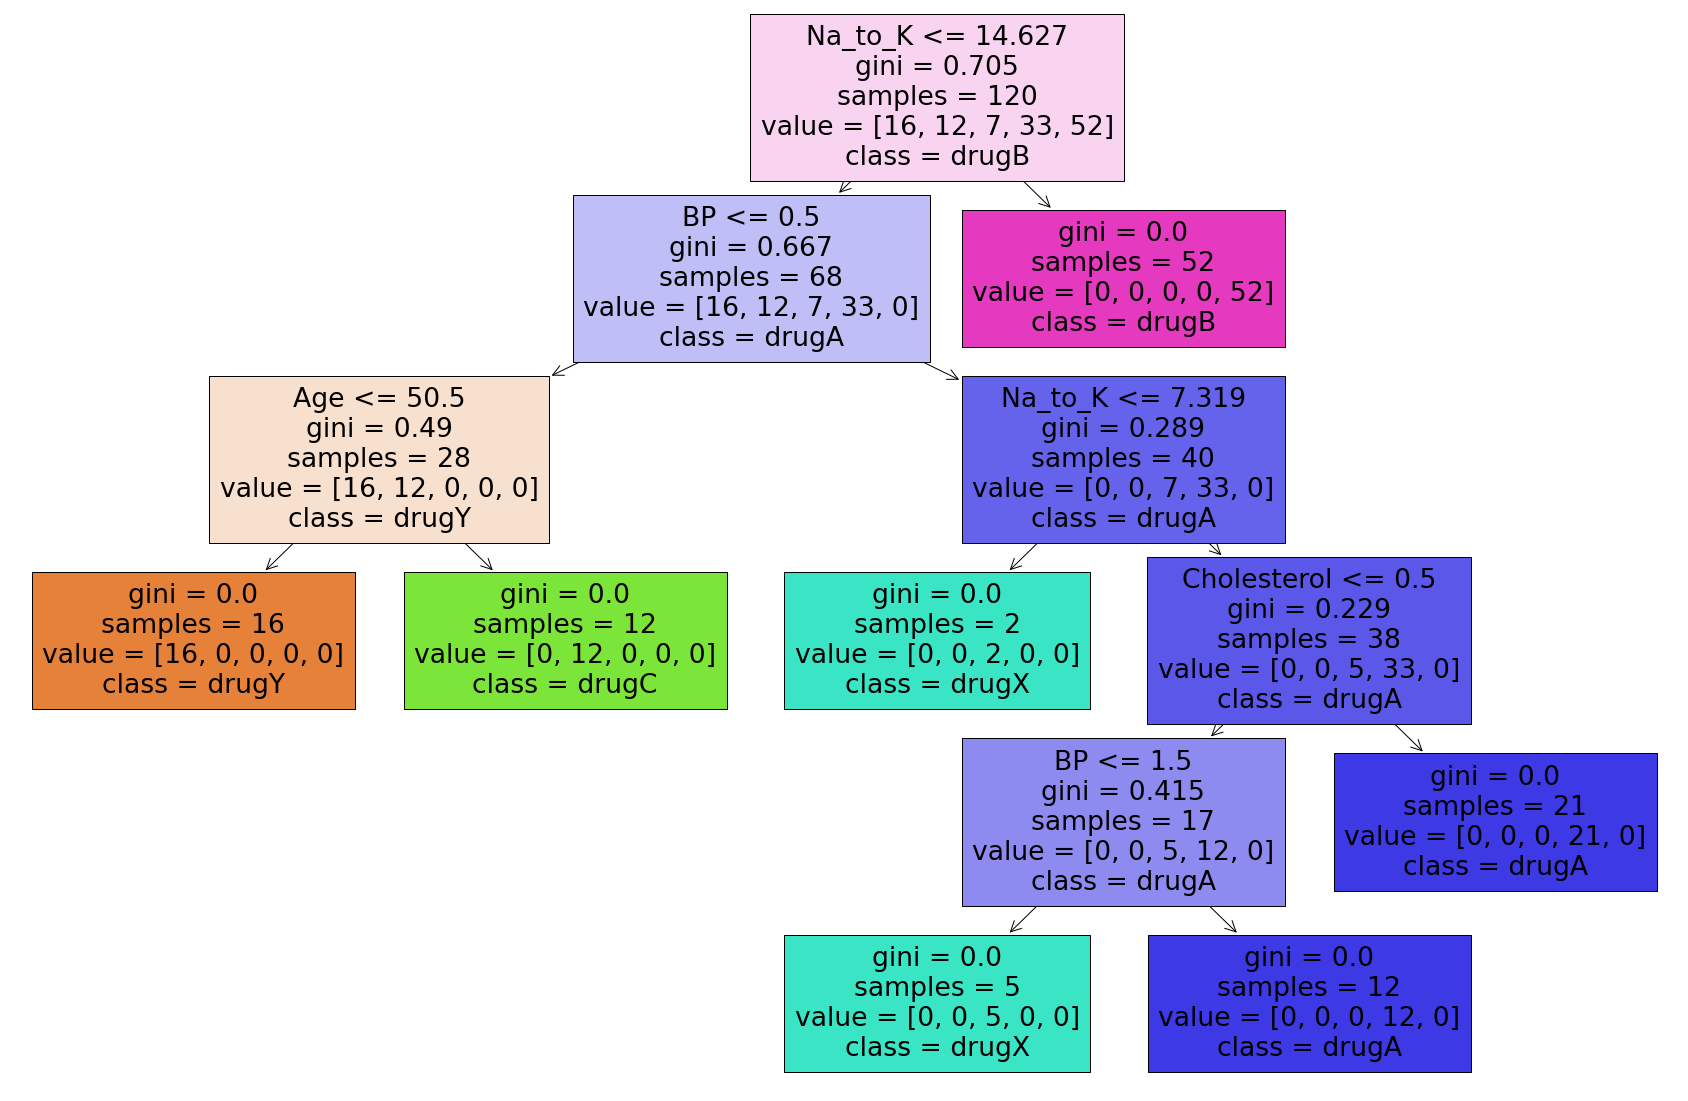

In [40]:
cols = df.drop('Drug', axis=1).columns
classes = df['Drug'].unique()

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

Decision Tree's Accuracy:  0.9875


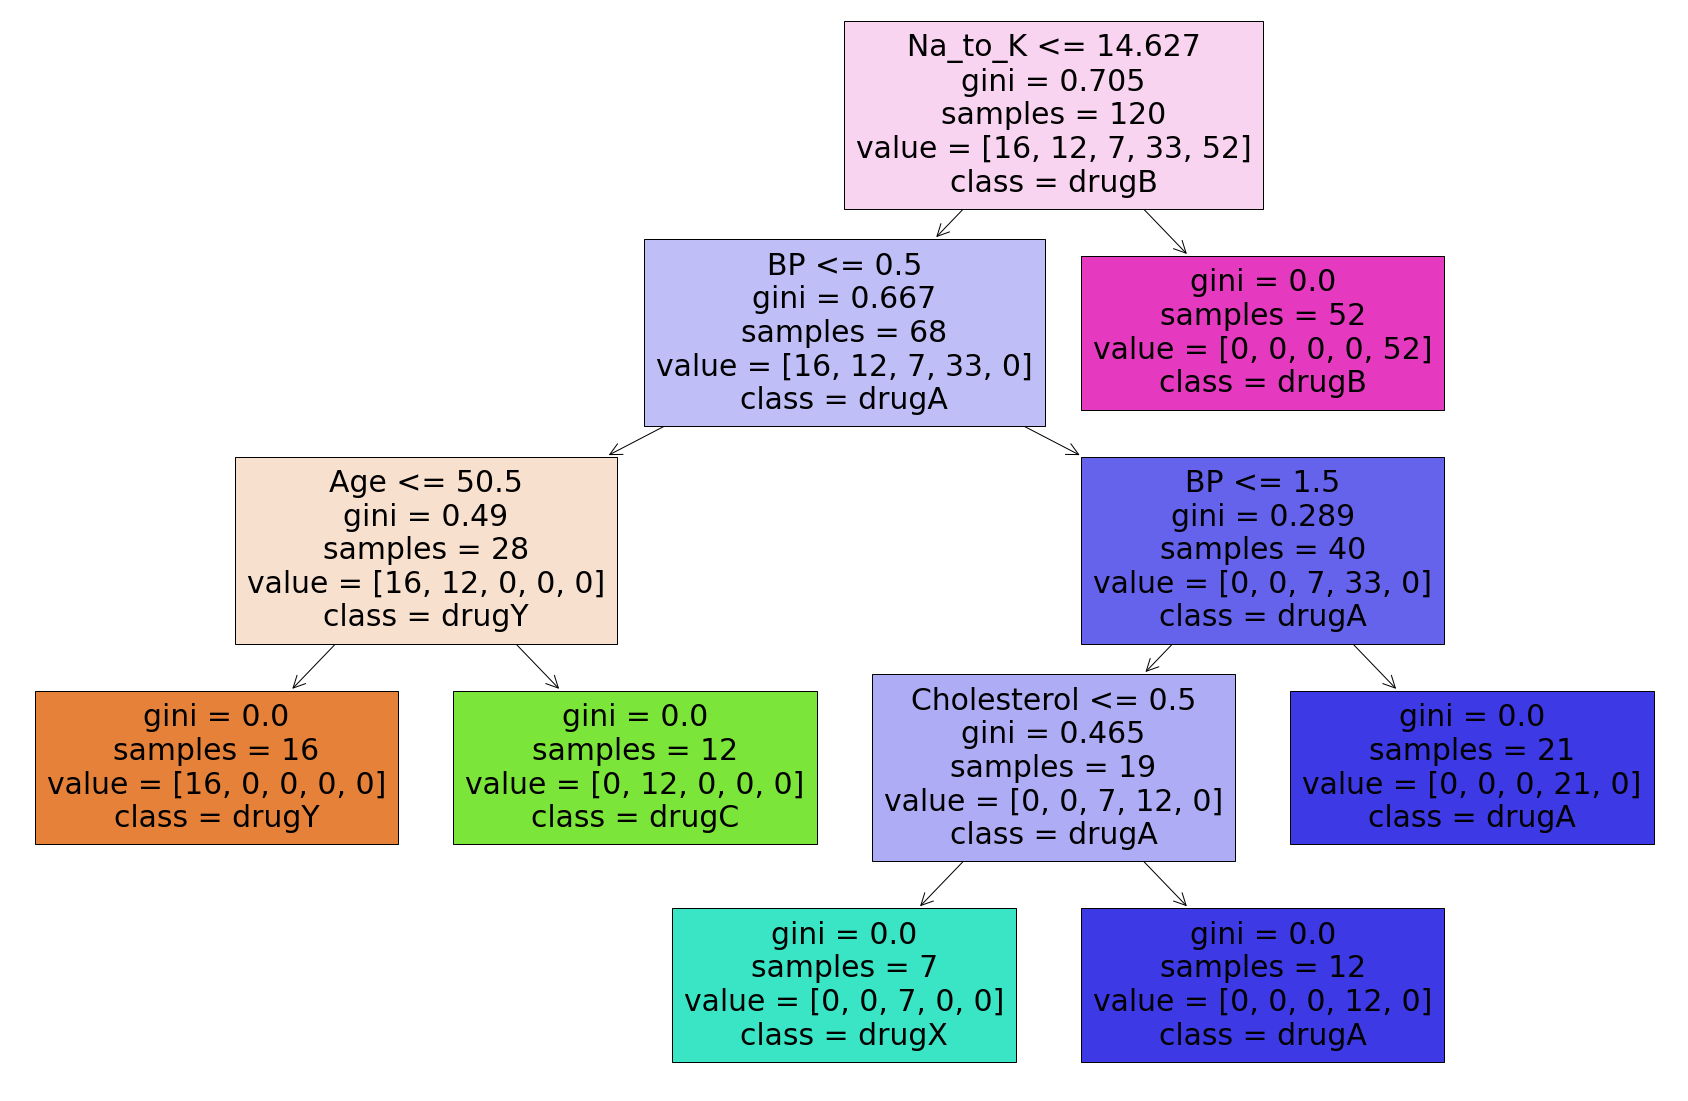

In [49]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.0, max_depth=4, min_samples_leaf=4)
tree_model.fit(X_train,y_train)
y_predict = tree_model.predict(X_test)
print("Decision Tree's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

In [50]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         9
       drugX       1.00      0.95      0.98        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [51]:
print("Random Forest Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Random Forest Accuracy:  0.9875
